문제 1

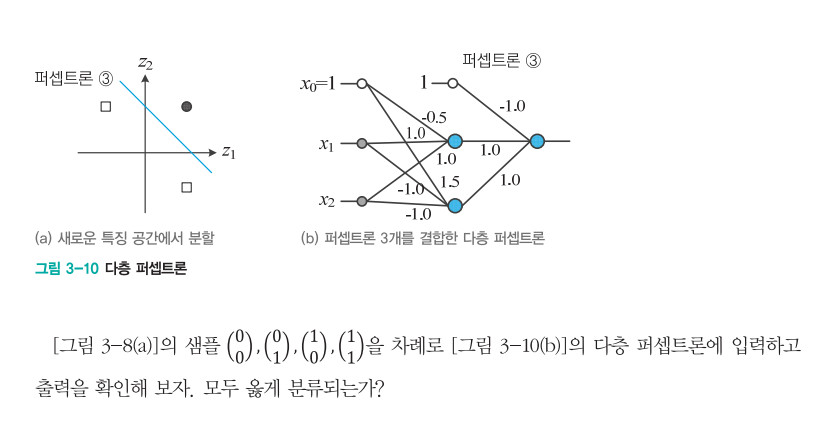

In [1]:
samples = [[0, 0], [0, 1], [1, 0], [1, 1]]

def xor(x1, x2):
    w1 = -0.5 + x1 * 1.0 + x2 * 1.0
    w2 = 1.5 + x1 * -1.0 + x2 * -1.0

    return -1.0 + w1 * 1.0 + w2 * 1.0


print([xor(x1, x2) for x1, x2 in samples])

[0.0, 0.0, 0.0, 0.0]


문제 2

In [2]:
import numpy as np
class Perceptron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias
    def predict(self, inputs):
        total_activation = np.dot(self.weights, inputs) + self.bias
        return 1 if total_activation > 0 else -1

# NOR 게이트 퍼셉트론
nor_weights = np.array([-1, -1])
nor_bias = 0
nor_perceptron = Perceptron(nor_weights, nor_bias)

# AND 게이트 퍼셉트론
and_weights = np.array([1, 1])
and_bias = -1
and_perceptron = Perceptron(and_weights, and_bias)

# 테스트 입력
test_inputs = [
    [-1, -1],
    [-1, 1],
    [1, -1],
    [1, 1]
]

# 결과 출력
print("NOR Gate Perceptron")
for inputs in test_inputs:
    print(f"Input: {inputs}, Output: {nor_perceptron.predict(inputs)}")

print("\nAND Gate Perceptron")
for inputs in test_inputs:
    print(f"Input: {inputs}, Output: {and_perceptron.predict(inputs)}")

NOR Gate Perceptron
Input: [-1, -1], Output: 1
Input: [-1, 1], Output: -1
Input: [1, -1], Output: -1
Input: [1, 1], Output: -1

AND Gate Perceptron
Input: [-1, -1], Output: -1
Input: [-1, 1], Output: -1
Input: [1, -1], Output: -1
Input: [1, 1], Output: 1


문제 3

수치 미분은 각 파라미터에 대해 함수를 두 번 (혹은 중앙차분법에서는 세 번) 평가해야 하므로, 역전파보다 계산 비용이 많이 든다. 역전파의 경우, 모든 파라미터에 대한 그레이디언트를 동시에 계산할 수 있습니다. 하지만, 수치 미분은 직관적으로 이해하기 쉽고, 복잡한 모델에서 디버깅 용도로 유용할 수 있다.

In [3]:
import numpy as np

def numerical_gradient(f, x, h=1e-5, method='central'):
    grad = np.zeros_like(x)
    if method == 'forward':
        for i in range(len(x)):
            x_plus_h = np.copy(x)
            x_plus_h[i] += h
            grad[i] = (f(x_plus_h) - f(x)) / h
    elif method == 'central':
        for i in range(len(x)):
            x_plus_h = np.copy(x)
            x_minus_h = np.copy(x)
            x_plus_h[i] += h
            x_minus_h[i] -= h
            grad[i] = (f(x_plus_h) - f(x_minus_h)) / (2 * h)
    return grad

# 예제 함수 f(x) = x^2
def f(x):
    return np.sum(x**2)

# 초기값
x = np.array([3.0, 4.0])

# 수치 미분을 사용한 그레이디언트 계산
grad_forward = numerical_gradient(f, x, method='forward')
grad_central = numerical_gradient(f, x, method='central')

# 출력
print("Forward Difference Method Gradient:", grad_forward)
print("Central Difference Method Gradient:", grad_central)

# 실제 그레이디언트: 2x
true_grad = 2 * x
print("True Gradient:", true_grad)


Forward Difference Method Gradient: [6.00001 8.00001]
Central Difference Method Gradient: [6. 8.]
True Gradient: [6. 8.]


In [4]:
import time

# 역전파를 사용한 그레이디언트 계산
def analytical_gradient(x):
    return 2 * x

# 시간 측정
start_time = time.time()
for _ in range(1000):
    grad_forward = numerical_gradient(f, x, method='forward')
end_time = time.time()
print("Forward Difference Method Time:", end_time - start_time)

start_time = time.time()
for _ in range(1000):
    grad_central = numerical_gradient(f, x, method='central')
end_time = time.time()
print("Central Difference Method Time:", end_time - start_time)

start_time = time.time()
for _ in range(1000):
    grad_analytical = analytical_gradient(x)
end_time = time.time()
print("Analytical Gradient Time:", end_time - start_time)


Forward Difference Method Time: 0.04197049140930176
Central Difference Method Time: 0.03141069412231445
Analytical Gradient Time: 0.001722574234008789


문제 4

In [5]:
import numpy as np

# 초기화
def initialize_weights(dimension):
    return np.random.rand(dimension)

# 활성화 함수 (여기서는 간단한 sign 함수 사용)
def activation(z):
    return np.where(z >= 0, 1, -1)

# 알고리즘 3-5: Stochastic Gradient Descent Perceptron
def sgd_perceptron(X, Y, eta, max_iter):
    m, n = X.shape
    U = initialize_weights(n)
    U_old = U.copy()

    for _ in range(max_iter):
        # 순서 섞기
        indices = np.random.permutation(m)
        X = X[indices]
        Y = Y[indices]

        for i in range(m):
            x_i = X[i]
            y_i = Y[i]

            # 계산
            zsum = np.dot(U, x_i)
            osum = activation(zsum)

            # 업데이트
            delta = y_i - osum
            U_old = U.copy()
            U = U + eta * delta * x_i

            # 수렴 조건 확인 (여기서는 단순하게 최대 반복 횟수로 제한)
            if np.allclose(U, U_old, atol=1e-5):
                return U

    return U

# 예제 데이터
X = np.array([[2, 3], [1, 5], [2, 2], [5, 3], [4, 4]])
Y = np.array([1, -1, 1, -1, 1])
eta = 0.1
max_iter = 1000

# 학습
U = sgd_perceptron(X, Y, eta, max_iter)
print("Final weights (SGD):", U)


Final weights (SGD): [0.89614199 0.98654831]


In [6]:
# 배치 버전 (Batch Gradient Descent Perceptron)
def batch_perceptron(X, Y, eta, max_iter):
    m, n = X.shape
    U = initialize_weights(n)
    U_old = U.copy()

    for _ in range(max_iter):
        zsum = np.dot(X, U)
        osum = activation(zsum)

        delta = Y - osum
        U_old = U.copy()
        U = U + eta * np.dot(X.T, delta) / m

        # 수렴 조건 확인
        if np.allclose(U, U_old, atol=1e-5):
            return U

    return U

# 예제 데이터 (위와 동일)
X = np.array([[2, 3], [1, 5], [2, 2], [5, 3], [4, 4]])
Y = np.array([1, -1, 1, -1, 1])
eta = 0.1
max_iter = 1000

# 학습
U_batch = batch_perceptron(X, Y, eta, max_iter)
print("Final weights (Batch):", U_batch)


Final weights (Batch): [-0.12769813 -0.15651232]


문제 5

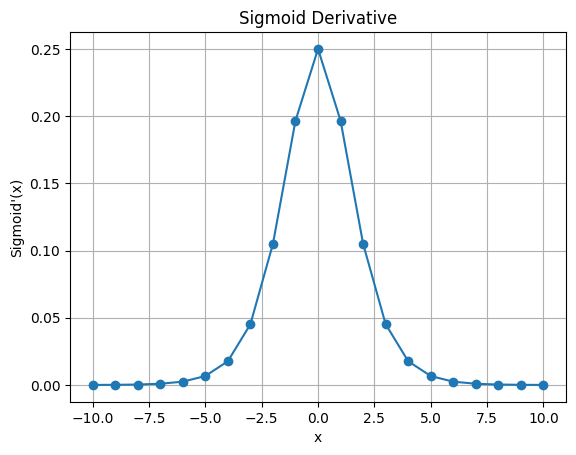

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# 시그모이드 함수 정의
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# 시그모이드 함수의 1차 도함수 정의
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# 매개변수 범위 [-10, 10]을 1씩 증가시키면서 계산
x_values = np.arange(-10, 11, 1)
y_values = sigmoid_derivative(x_values)

# 그래프 그리기
plt.plot(x_values, y_values, marker='o')
plt.title('Sigmoid Derivative')
plt.xlabel('x')
plt.ylabel("Sigmoid'(x)")
plt.grid(True)
plt.show()


문제 6

1. **바이어스 노드 방식**은 입력 벡터에 상수 1을 추가하고 바이어스 가중치를 학습함으로써 임계값을 자동으로 학습합니다.
2. **임계값 방식**은 명시적으로 임계값 \( T \)를 설정하고, 가중치를 학습하는 동안 이 값을 고정합니다.

In [8]:
class PerceptronWithThreshold:
    def __init__(self, input_dim, threshold):
        self.weights = np.random.rand(input_dim)
        self.threshold = threshold
    def activation(self, z):
        return 1 if z > self.threshold else -1
    def predict(self, x):
        z = np.dot(self.weights, x)
        return self.activation(z)
    def train(self, X, Y, eta, max_iter):
        for _ in range(max_iter):
            for x, y in zip(X, Y):
                z = np.dot(self.weights, x)
                y_pred = self.activation(z)
                self.weights += eta * (y - y_pred) * x

# Example usage
X = np.array([[2, 3], [1, 5], [2, 2], [5, 3], [4, 4]])
Y = np.array([1, -1, 1, -1, 1])
eta = 0.1
max_iter = 1000
threshold = 0.5
perceptron_threshold = PerceptronWithThreshold(input_dim=2, threshold=threshold)
perceptron_threshold.train(X, Y, eta, max_iter)
print("Weights (with threshold):", perceptron_threshold.weights)
print("Threshold:", perceptron_threshold.threshold)

Weights (with threshold): [0.35526665 0.13801321]
Threshold: 0.5


In [9]:
import numpy as np

class PerceptronWithBias:
    def __init__(self, input_dim):
        self.weights = np.random.rand(input_dim)
        self.bias = np.random.rand()
    def activation(self, z):
        return 1 if z > 0 else -1
    def predict(self, x):
        z = np.dot(self.weights, x) + self.bias
        return self.activation(z)
    def train(self, X, Y, eta, max_iter):
        for _ in range(max_iter):
            for x, y in zip(X, Y):
                z = np.dot(self.weights, x) + self.bias
                y_pred = self.activation(z)
                self.weights += eta * (y - y_pred) * x
                self.bias += eta * (y - y_pred)

# Example usage
X = np.array([[2, 3], [1, 5], [2, 2], [5, 3], [4, 4]])
Y = np.array([1, -1, 1, -1, 1])
eta = 0.1
max_iter = 1000
perceptron = PerceptronWithBias(input_dim=2)
perceptron.train(X, Y, eta, max_iter)
print("Weights (with bias):", perceptron.weights)
print("Bias:", perceptron.bias)

Weights (with bias): [ 0.13986373 -0.3245438 ]
Bias: 1.2537083884142468


문제 7

In [10]:
import numpy as np

# 조건 함수 정의
def condition(x1, x2, w0, w1, w2):
    return np.sign(w0 + w1 * x1 + w2 * x2)

# AND 연산의 진리표를 만족하는지 확인
def check_conditions(w0, w1, w2):
    data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    labels = np.array([-1, -1, -1, 1])

    for (x1, x2), y in zip(data, labels):
        if condition(x1, x2, w0, w1, w2) != y:
            return False
    return True

# 1) w1과 w2의 값을 고정했을 때, w0이 어느 범위일 때 옳게 분류하는지
w1 = 1.0
w2 = 1.0

w0_values = []
for w0 in np.arange(-10, 10, 0.1):
    if check_conditions(w0, w1, w2):
        w0_values.append(w0)

print("w1 = 1.0, w2 = 1.0 일 때, w0의 범위는:", w0_values)

# 2) w0과 w2의 값을 고정했을 때, w1이 어느 범위일 때 옳게 분류하는지
w0 = -0.5
w2 = 1.0

w1_values = []
for w1 in np.arange(-10, 10, 0.1):
    if check_conditions(w0, w1, w2):
        w1_values.append(w1)

print("w0 = -0.5, w2 = 1.0 일 때, w1의 범위는:", w1_values)


w1 = 1.0, w2 = 1.0 일 때, w0의 범위는: [-1.9000000000000288, -1.8000000000000291, -1.7000000000000295, -1.6000000000000298, -1.5000000000000302, -1.4000000000000306, -1.300000000000031, -1.2000000000000313, -1.1000000000000316, -1.000000000000032]
w0 = -0.5, w2 = 1.0 일 때, w1의 범위는: []


문제 8

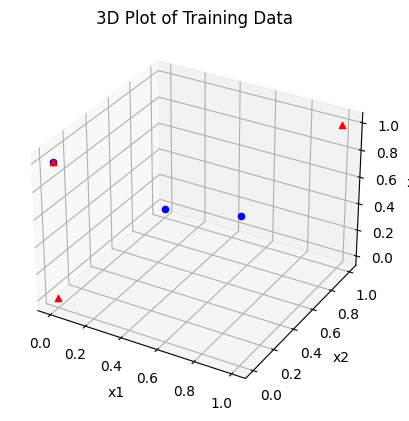

Final weights: [0. 0. 0.]
Final bias: -0.2


<ipython-input-11-6a8a4d58c5c7>:75: RuntimeWarning: divide by zero encountered in divide
  zz = -(final_weights[0] * xx + final_weights[1] * yy + final_bias) / final_weights[2]
/usr/local/lib/python3.10/dist-packages/mpl_toolkits/mplot3d/art3d.py:1180: RuntimeWarning: invalid value encountered in subtract
  v1[poly_i, :] = ps[i1, :] - ps[i2, :]
/usr/local/lib/python3.10/dist-packages/mpl_toolkits/mplot3d/art3d.py:1181: RuntimeWarning: invalid value encountered in subtract
  v2[poly_i, :] = ps[i2, :] - ps[i3, :]
/usr/local/lib/python3.10/dist-packages/mpl_toolkits/mplot3d/proj3d.py:180: RuntimeWarning: invalid value encountered in divide
  txs, tys, tzs = vecw[0]/w, vecw[1]/w, vecw[2]/w


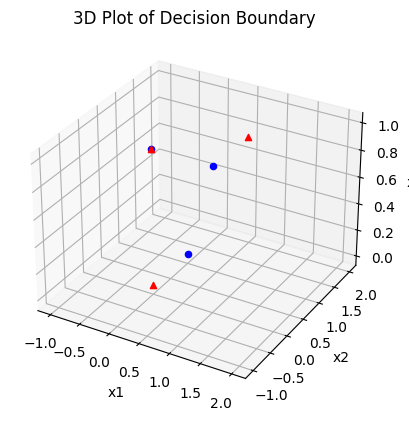

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 데이터셋 정의
X = np.array([
    [0, 0, 0],
    [0, 0, 1],
    [1, 1, 1],
    [1, 0, 1],
    [0, 0, 1],
    [0, 1, 0]
])

y = np.array([1, -1, 1, -1, 1, -1])

# 1. 훈련집합을 3차원 공간에 그리기
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 데이터 포인트 플로팅
for xi, yi in zip(X, y):
    color = 'r' if yi == 1 else 'b'
    marker = '^' if yi == 1 else 'o'
    ax.scatter(xi[0], xi[1], xi[2], color=color, marker=marker)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
plt.title('3D Plot of Training Data')
plt.show()

# 퍼셉트론 클래스 정의
class Perceptron:
    def __init__(self, input_dim, learning_rate=0.1):
        self.weights = np.zeros(input_dim)
        self.bias = 0
        self.learning_rate = learning_rate

    def activation(self, z):
        return 1 if z >= 0 else -1

    def predict(self, x):
        z = np.dot(self.weights, x) + self.bias
        return self.activation(z)

    def train(self, X, y, max_iter):
        for _ in range(max_iter):
            for xi, yi in zip(X, y):
                prediction = self.predict(xi)
                if prediction != yi:
                    self.weights += self.learning_rate * (yi - prediction) * xi
                    self.bias += self.learning_rate * (yi - prediction)
        return self.weights, self.bias

# 퍼셉트론 학습
perceptron = Perceptron(input_dim=3, learning_rate=0.1)
final_weights, final_bias = perceptron.train(X, y, max_iter=1000)

print("Final weights:", final_weights)
print("Final bias:", final_bias)

# 3차원 그래프로 시각화
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 데이터 포인트 플로팅
for xi, yi in zip(X, y):
    color = 'r' if yi == 1 else 'b'
    marker = '^' if yi == 1 else 'o'
    ax.scatter(xi[0], xi[1], xi[2], color=color, marker=marker)

# 결정 경계 그리기
xx, yy = np.meshgrid(np.linspace(-1, 2, 100), np.linspace(-1, 2, 100))
zz = -(final_weights[0] * xx + final_weights[1] * yy + final_bias) / final_weights[2]

ax.plot_surface(xx, yy, zz, alpha=0.3, color='green')

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
plt.title('3D Plot of Decision Boundary')
plt.show()


문제 9

$ J(w) = \sum_{i=1}^{n}(y_i - \tau (w^T x_i))^2 $

J_i에 대한 미분

$ J_i(w) = (y_i - \tau (w^T x_i))^2 $  
$ \frac{∂J_i(w)} {∂w} = 2(y_i-\tau(w^Tx_i))\frac{∂(y_i - \tau (w^Tx_i))}{∂w} $  
$ \frac{∂(y_i - \tau (w^Tx_i))}{∂w} = - \frac{∂\tau (w^Tx_i))}{∂w} $  
$ \frac{∂\tau (w^Tx_i))}{∂w} = \tau' (w^Tx_i)x_i $

최종 결과  
$ \frac{∂J_i(w)} {∂w} = -2 (y_i - \tau(w^Tx_i))\tau' (w^Tx_i)x_i$

$\frac{∂J(w)} {∂w} = \sum_{i=1}^n -2 (y_i - \tau(w^Tx_i))\tau' (w^Tx_i)x_i$

가중치 갱신 규칙  
$ w_{new} = w_{old} - \eta \frac{∂J(w)} {∂w} $  
$ w = w + \eta \sum_{i=1}^n -2 (y_i - \tau(w^Tx_i))\tau' (w^Tx_i)x_i $


문제 10

In [12]:
def fit(self, X, y):
    for _ in range(self.max_iter):
        errors = 0
        for xi, yi in zip(X, y):
            prediction = self.predict(xi)
            if prediction != yi:
                errors += 1
                self.weights += self.learning_rate * (yi - prediction) * xi
                self.bias += self.learning_rate * (yi - prediction)
        # 현재 가중치가 더 나은 경우 업데이트
        if errors < self.best_error:
            self.best_weights = self.weights.copy()
            self.best_bias = self.bias
            self.best_error = errors
        # 최적의 가중치를 계속 추적
        if self.best_error == 0:
            break
    # 최종 가중치를 최적의 가중치로 설정
    self.weights = self.best_weights
    self.bias = self.best_bias

문제 11

In [13]:
import numpy as np

# 활성화 함수 정의
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def step_function(x):
    return np.where(x >= 0.5, 1, 0)

# 다층 퍼셉트론 클래스 정의
class MLP:
    def __init__(self, input_dim, hidden_dim, output_dim, learning_rate=0.1):
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim
        self.learning_rate = learning_rate

        # 가중치 초기화
        self.weights_input_hidden = np.random.randn(self.input_dim, self.hidden_dim)
        self.weights_hidden_output = np.random.randn(self.hidden_dim, self.output_dim)
        self.bias_hidden = np.zeros(self.hidden_dim)
        self.bias_output = np.zeros(self.output_dim)

    def forward(self, X):
        # 은닉층으로의 전방전파
        self.hidden_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        self.hidden_output = sigmoid(self.hidden_input)

        # 출력층으로의 전방전파
        self.final_input = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
        self.final_output = sigmoid(self.final_input)

        return self.final_output

    def backward(self, X, y, output):
        # 출력층의 오류
        output_error = y - output
        output_delta = output_error * sigmoid_derivative(output)

        # 은닉층의 오류
        hidden_error = output_delta.dot(self.weights_hidden_output.T)
        hidden_delta = hidden_error * sigmoid_derivative(self.hidden_output)

        # 가중치 및 바이어스 업데이트
        self.weights_hidden_output += self.hidden_output.T.dot(output_delta) * self.learning_rate
        self.bias_output += np.sum(output_delta, axis=0) * self.learning_rate
        self.weights_input_hidden += X.T.dot(hidden_delta) * self.learning_rate
        self.bias_hidden += np.sum(hidden_delta, axis=0) * self.learning_rate

    def train(self, X, y, epochs):
        for _ in range(epochs):
            output = self.forward(X)
            self.backward(X, y, output)

# XOR 데이터셋 정의
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# MLP 학습
mlp = MLP(input_dim=2, hidden_dim=2, output_dim=1, learning_rate=0.1)
mlp.train(X, y, epochs=10000)

# 예측 결과 출력
output = mlp.forward(X)
predicted = step_function(output)
print("Predicted outputs:")
print(predicted)

# 실제 출력과 비교
print("Actual outputs:")
print(y)


Predicted outputs:
[[0]
 [1]
 [1]
 [0]]
Actual outputs:
[[0]
 [1]
 [1]
 [0]]


문제 12

In [14]:
import numpy as np

# 활성화 함수 정의
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def step_function(x):
    return np.where(x >= 0.5, 1, 0)

# 다층 퍼셉트론 클래스 정의
class MLP:
    def __init__(self, input_dim, hidden_dim, output_dim, learning_rate=0.1):
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim
        self.learning_rate = learning_rate

        # 가중치 초기화
        self.weights_input_hidden = np.random.randn(self.input_dim, self.hidden_dim)
        self.weights_hidden_output = np.random.randn(self.hidden_dim, self.output_dim)
        self.bias_hidden = np.zeros(self.hidden_dim)
        self.bias_output = np.zeros(self.output_dim)

    def forward(self, X):
        # 은닉층으로의 전방전파
        self.hidden_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        self.hidden_output = sigmoid(self.hidden_input)

        # 출력층으로의 전방전파
        self.final_input = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
        self.final_output = sigmoid(self.final_input)

        return self.final_output

    def backward(self, X, y, output):
        # 출력층의 오류
        output_error = y - output
        output_delta = output_error * sigmoid_derivative(output)

        # 은닉층의 오류
        hidden_error = output_delta.dot(self.weights_hidden_output.T)
        hidden_delta = hidden_error * sigmoid_derivative(self.hidden_output)

        # 가중치 및 바이어스 업데이트
        self.weights_hidden_output += self.hidden_output.T.dot(output_delta) * self.learning_rate
        self.bias_output += np.sum(output_delta, axis=0) * self.learning_rate
        self.weights_input_hidden += X.T.dot(hidden_delta) * self.learning_rate
        self.bias_hidden += np.sum(hidden_delta, axis=0) * self.learning_rate

    def train(self, X, y, epochs):
        for _ in range(epochs):
            output = self.forward(X)
            self.backward(X, y, output)

# 첫 번째 문제의 데이터셋 정의
X1 = np.array([[0, 0], [0, 1], [1, 0], [1, 1], [0, 0.5], [0.5, 0], [1, 0.5], [0.5, 1]])
y1 = np.array([[0], [1], [1], [0], [1], [1], [0], [0]])

# MLP 학습
mlp1 = MLP(input_dim=2, hidden_dim=2, output_dim=1, learning_rate=0.1)
mlp1.train(X1, y1, epochs=10000)

# 예측 결과 출력
output1 = mlp1.forward(X1)
predicted1 = step_function(output1)
print("Predicted outputs for the first problem:")
print(predicted1)

# 실제 출력과 비교
print("Actual outputs for the first problem:")
print(y1)


Predicted outputs for the first problem:
[[0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]]
Actual outputs for the first problem:
[[0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]]


In [15]:
# 두 번째 문제의 데이터셋 정의
X2 = np.array([[0, 0], [0, 1], [1, 0], [1, 1], [0.5, 0], [0.5, 1], [0, 0.5], [1, 0.5]])
y2 = np.array([[1], [1], [1], [0], [0], [0], [1], [0]])

# MLP 학습
mlp2 = MLP(input_dim=2, hidden_dim=2, output_dim=1, learning_rate=0.1)
mlp2.train(X2, y2, epochs=10000)

# 예측 결과 출력
output2 = mlp2.forward(X2)
predicted2 = step_function(output2)
print("Predicted outputs for the second problem:")
print(predicted2)

# 실제 출력과 비교
print("Actual outputs for the second problem:")
print(y2)


Predicted outputs for the second problem:
[[1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]]
Actual outputs for the second problem:
[[1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]]


In [16]:
import numpy as np

# 활성화 함수 정의
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def step_function(x):
    return np.where(x >= 0.5, 1, 0)

# 다층 퍼셉트론 클래스 정의
class MLP:
    def __init__(self, input_dim, hidden_dim, output_dim, learning_rate=0.1):
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim
        self.learning_rate = learning_rate

        # 가중치 초기화
        self.weights_input_hidden = np.random.randn(self.input_dim, self.hidden_dim)
        self.weights_hidden_output = np.random.randn(self.hidden_dim, self.output_dim)
        self.bias_hidden = np.zeros(self.hidden_dim)
        self.bias_output = np.zeros(self.output_dim)

    def forward(self, X):
        # 은닉층으로의 전방전파
        self.hidden_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        self.hidden_output = sigmoid(self.hidden_input)

        # 출력층으로의 전방전파
        self.final_input = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
        self.final_output = sigmoid(self.final_input)

        return self.final_output

    def backward(self, X, y, output):
        # 출력층의 오류
        output_error = y - output
        output_delta = output_error * sigmoid_derivative(output)

        # 은닉층의 오류
        hidden_error = output_delta.dot(self.weights_hidden_output.T)
        hidden_delta = hidden_error * sigmoid_derivative(self.hidden_output)

        # 가중치 및 바이어스 업데이트
        self.weights_hidden_output += self.hidden_output.T.dot(output_delta) * self.learning_rate
        self.bias_output += np.sum(output_delta, axis=0) * self.learning_rate
        self.weights_input_hidden += X.T.dot(hidden_delta) * self.learning_rate
        self.bias_hidden += np.sum(hidden_delta, axis=0) * self.learning_rate

    def train(self, X, y, epochs):
        for _ in range(epochs):
            output = self.forward(X)
            self.backward(X, y, output)

# 두 번째 문제의 데이터셋 정의
X2 = np.array([[0, 0], [0, 1], [1, 0], [1, 1], [0.5, 0], [0.5, 1], [0, 0.5], [1, 0.5]])
y2 = np.array([[1], [1], [1], [0], [0], [0], [1], [0]])

# MLP 학습
mlp2 = MLP(input_dim=2, hidden_dim=2, output_dim=1, learning_rate=0.1)
mlp2.train(X2, y2, epochs=10000)

# 예측 결과 출력
output2 = mlp2.forward(X2)
predicted2 = step_function(output2)
print("Predicted outputs for the second problem:")
print(predicted2)

# 실제 출력과 비교
print("Actual outputs for the second problem:")
print(y2)


Predicted outputs for the second problem:
[[1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]]
Actual outputs for the second problem:
[[1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]]


은닉 노드의 수가 적절하게 설정되면 모델의 복잡도를 줄이고, 과적합을 방지하여 일반화 능력을 향상시킬 수 있다.  
은닉 노드가 너무 많으면 모델이 과적합될 수 있고, 너무 적으면 학습할 수 있는 패턴이 제한된다.  


문제 13

문제 14